# TP: Visualisation et Tests Statistiques

### **Étape 1 : Exploration et statistiques descriptives**

In [ ]:
# Importer les bibliotheques necessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Charger le dataset Titanic
df = pd.read_csv('/content/sample_data/titanic.csv')

In [ ]:
# Identifier les types de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Calculer des statistiques descriptives
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Questions :

1.   Quelles variables sont quantitatives ?
     - Les variables quantitatives principales sont `Age` , `Fare`, `SibSp` (nombre de frères/sœurs/conjoints), `Parch` (nombre de parents/enfants)
2.   Quelle variable semble la plus dispersée ?
     - `Fare` est la plus dispersée, avec un écart-type d'environ 49.69

### **Étape 2 : Visualisation simple**

<Axes: xlabel='Age', ylabel='Count'>

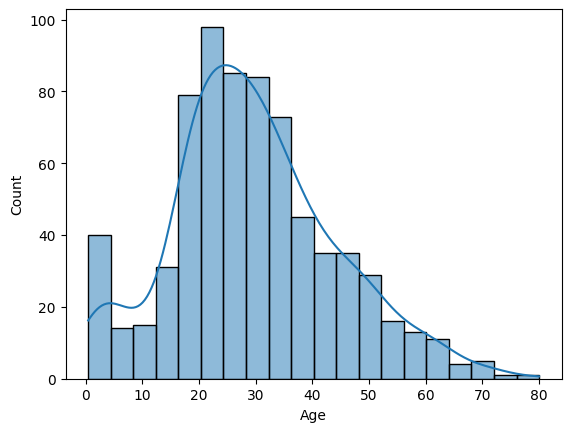

In [ ]:
# Histogramme de 'Age' ou 'Fare'
sns.histplot(df['Age'], kde=True)

<Axes: xlabel='Pclass', ylabel='Fare'>

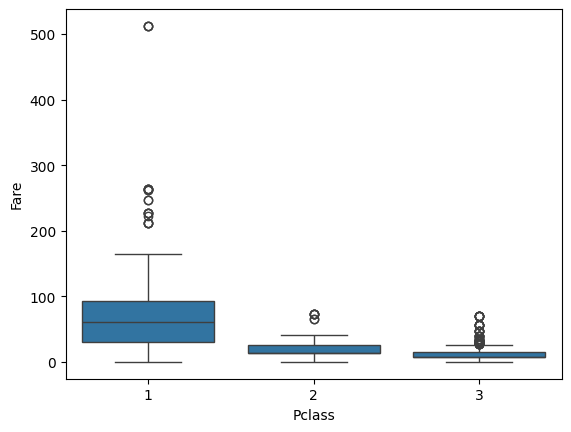

In [ ]:
# Boxplot de 'Fare' par 'Pclass'
sns.boxplot(x=df['Pclass'], y=df['Fare'], data=df)

<Axes: xlabel='Sex', ylabel='count'>

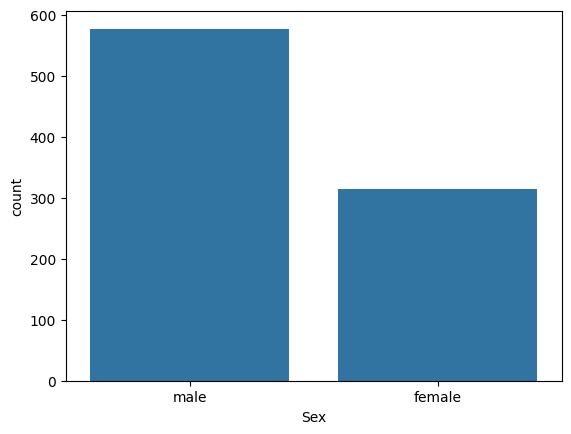

In [ ]:
# Countplot de 'Survived' ou 'Sex'
sns.countplot(x='Sex', data=df)

### Questions :

1.    L’âge des passagers semble-t-il normalement distribué ?
      - Non, l'âge n'est pas parfaitement normalement distribué. L'histogramme montre une légère asymétrie droite.
2.    Quel groupe a le tarif le plus élevé ?
      - La classe 1 (Pclass=1) a le tarif moyen le plus elevé (environ 84.15).
3.    Y a-t-il des outliers visibles dans Fare ?
      - Oui, il y a des outliers visibles dans 'Fare', particulièrement en classe 1 (tarifs > 100-200). Par méthode IQR, il y en a environ 116, indiquant des tarifs extrêmes (ex. : suites luxueuses).

### **Étape 3 : Visualisation avancée**

In [11]:
# Utilisé DataFrame nettoyée
df = pd.read_csv('/content/sample_data/titanic_clean.csv')

<Axes: >

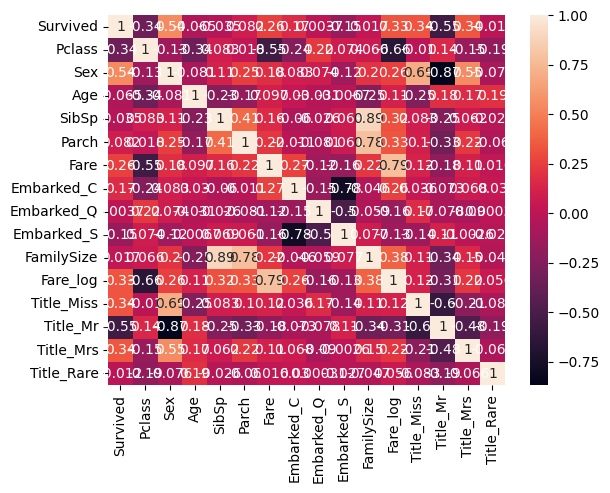

In [12]:
# Heatmap de corrélation (variables numériques)
sns.heatmap(df.corr(), annot=True)

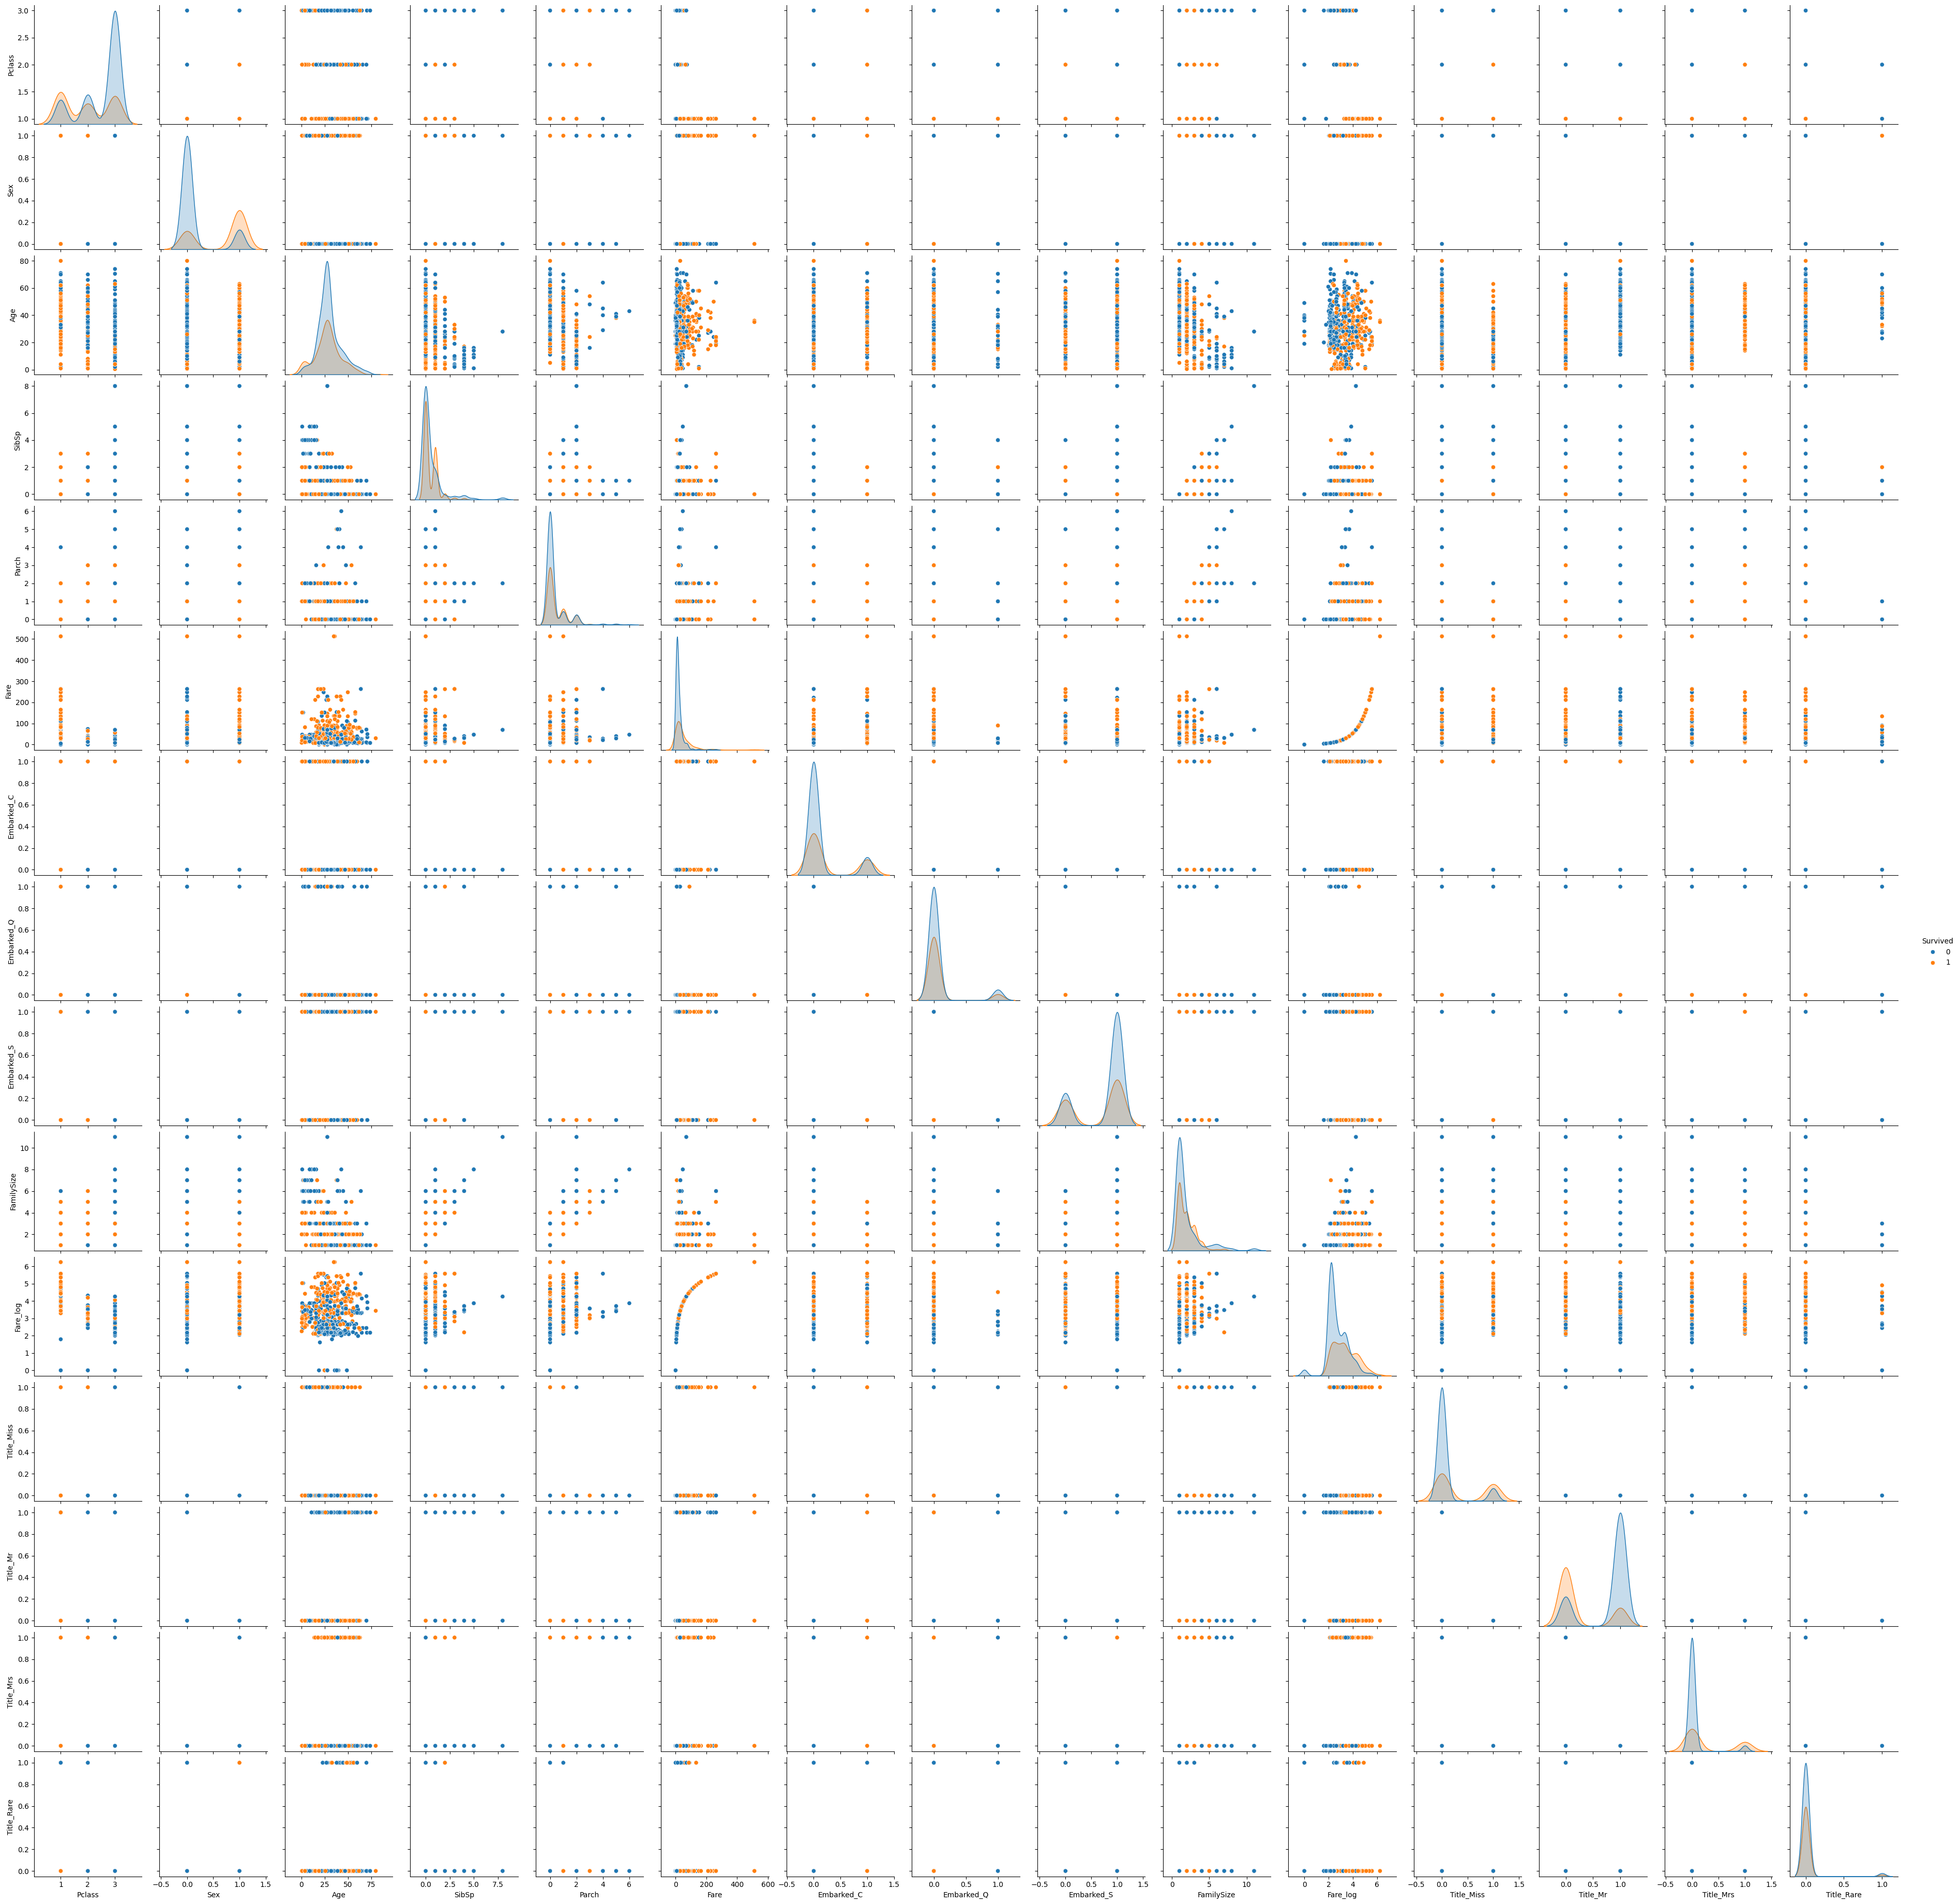

In [13]:
# Pairplot pour visualiser plusieurs relations
sns.pairplot(df, hue='Survived')

<Axes: xlabel='Age', ylabel='Fare'>

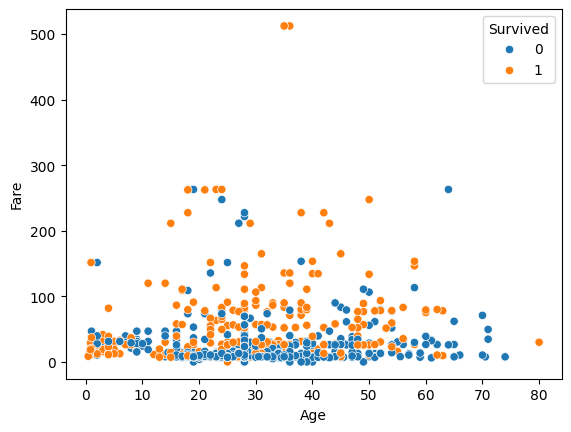

In [14]:
# Scatterplot 'Age' vs 'Fare'
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)

### Questions :

1.    Quelles variables semblent corrélées ?
      - `Fare` et `Pclass` sont négativement corrélées (environ -0.55, classes basses = tarifs hauts).
      `Survived` corrèle négativement avec `Pclass` (environ -0.34, classes hautes survivent plus).
2.    Observe-t-on des tendances intéressantes pour la survie ?
      - Oui, le pairplot et scatter montrent que les survivants sont plus souvent en classes supérieures, femmes, et enfants/jeunes.

### **Étape 4 : Test de normalité**

In [24]:
# Test de Shapiro
df = pd.read_csv('/content/sample_data/titanic.csv')
import scipy.stats
scipy.stats.shapiro(df['Age'].dropna())

ShapiroResult(statistic=np.float64(0.9814577414504954), pvalue=np.float64(7.337348958673594e-08))

### Questions :

1.    L’âge suit-il une distribution normale ?
      - Non, le test de Shapiro donne une p-value ≈ 7.33e-08 donc rejetant H0. La distribution n'est pas normale.
2.    Peut-on utiliser des tests paramétriques sur cette variable ?
      - Non, car les tests paramétriques (comme t-test) assument la normalité.

### **Étape 5 : Test t de Student**

In [23]:
# H0 : Moyennes égales
scipy.stats.ttest_ind(df[df['Sex']=='male']['Age'].dropna(), df[df['Sex']=='female']['Age'].dropna())


TtestResult(statistic=np.float64(2.499206354920835), pvalue=np.float64(0.012671296797013709), df=np.float64(712.0))

### Questions :

1.    L’âge moyen diffère-t-il entre hommes et femmes ?
      - Oui, l'âge moyen des hommes est ≈30.73 ans, des femmes ≈27.92 ans. Le t-test donne p-value ≈0.013 (< 0.05), rejetant H0.
2.    Quelle conclusion tirez-vous ?
      - Il y a une différence significative : les hommes étaient en moyenne plus âgés que les femmes à bord.

### **Étape 6 : Test Chi-deux**

In [28]:
# Table de contingence
contingence = pd.crosstab(df['Sex'], df['Survived'])

In [27]:
# H0 : Pas d'independance
scipy.stats.chi2_contingency(contingence)

Chi2ContingencyResult(statistic=np.float64(260.71702016732104), pvalue=np.float64(1.1973570627755645e-58), dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

In [29]:
# Table de contingence
contingence = pd.crosstab(df['Pclass'], df['Survived'])
# H0 : Pas d'independance
scipy.stats.chi2_contingency(contingence)

Chi2ContingencyResult(statistic=np.float64(102.88898875696056), pvalue=np.float64(4.549251711298793e-23), dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

### Questions :

1.    La survie dépend-elle du sexe ?
      - Oui, le test Chi-deux donne p-value ≈1.20e-58 (< 0.05), rejetant H0.
2.    La classe influence-t-elle la survie ?
      - Oui, pour `Pclass` vs `Survived`, p-value ≈4.55e-23 (< 0.05). Les classes supérieures survivent plus

### **Étape 7 : ANOVA**

In [30]:
# H0 : Toutes moyennes égales.
scipy.stats.f_oneway(df[df['Pclass']==1]['Fare'], df[df['Pclass']==2]['Fare'], df[df['Pclass']==3]['Fare'])

F_onewayResult(statistic=np.float64(242.34415651744814), pvalue=np.float64(1.0313763209141171e-84))

### Questions :

1.    Les tarifs moyens des classes diffèrent-ils ?
      - Oui, l'ANOVA donne p-value ≈1.03e-84 (< 0.05), rejetant H0. Il y a des différences significatives.
2.    Quelle classe a le tarif le plus élevé ?
      - La classe 1 (moyenne ≈84.15), suivie de 2 (≈20.66) et 3 (≈13.68).

### **Étape 8 : Corrélations**

In [38]:
# Pearson : Pour linéaire
df_corr = df[['Age', 'Fare']]
scipy.stats.pearsonr(df_corr['Age'], df_corr['Fare'])

PearsonRResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [39]:
# Spearman : Pour non-linéaire
df_corr = df[['Age', 'Fare']]
scipy.stats.spearmanr(df_corr['Age'], df_corr['Fare'])

SignificanceResult(statistic=nan, pvalue=nan)